# Analysis & Conclusion

In this section, we would explore how the 10 stocks performed during the pandemic and imagine we invest $1M dollarson to explore the changes of the values of our opitimized portforlio.

## 1. Download Stock Market Data

We pulled out the monthly data from Jan to Nov 2020


In [ ]:
# some useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     |████████████████████████████████| 153kB 7.8MB/s 
     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13485 sha256=f20112525331d5916c59b3b49776d110d3b38e0b5110ece743bef9167a2373bb
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for parse: filename=parse-1.18.0-cp36-none-any.whl size=24133 sha256=c0eae4c2264e8cb28741615f725e9c5d1dcd89855e9e9ef4b13428fff5fb4083
  Stored in directory: /root/.cache/pip/wheels/2a/53/09/869ca5781ede342254ffac09ca99461b008c3e5f8dd079b0c0
Successfully built fake-useragent parse
ERROR: pyppeteer 0.2.2 has requirement urllib3<2.0.0,>=1.25.8, but you'll have urllib3 1.24.3 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
# Assign the ticker list that we want to scrap
tickers_list = ['BKR', 'CVX', 'EOG', 'MPC', 'OKE', 'PSX', 'PXD', 'VLO', 'WMB', 'XOM']
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2020',end_date='11/03/2020',interval='1mo') for ticker in tickers_list}

In [ ]:
# Each stock has 11 monthly entries and 7 variables
dow_prices

{'BKR':                  open       high        low  close   adjclose     volume ticker
 2020-01-01  25.680000  25.990000  21.120001  21.66  21.006830  119582300    BKR
 2020-02-01  21.570000  22.590000  15.710000  16.09  15.731494  137404800    BKR
 2020-03-01  16.389999  17.400000   9.120000  10.50  10.266047  236691700    BKR
 2020-04-01  10.090000  14.920000   9.440000  13.95  13.639175  151609200    BKR
 2020-05-01  13.580000  16.730000  12.920000  16.51  16.142138  109722700    BKR
 2020-06-01  16.500000  19.299999  14.070000  15.39  15.224813  164114800    BKR
 2020-07-01  15.600000  17.180000  14.570000  15.49  15.323739  142463700    BKR
 2020-08-01  15.350000  17.770000  14.120000  14.28  14.126726  109337000    BKR
 2020-09-01  14.060000  15.610000  12.960000  13.29  13.290000  156653300    BKR
 2020-10-01  13.000000  14.790000  12.130000  14.77  14.770000  158162200    BKR
 2020-11-01  15.000000  16.170000  14.800000  15.66  15.660000   26666800    BKR,
 'CVX':             

## 2. Create a dataframe that shows the price of the 10 stocks

2.1 We still extract 'adjclose' variable as price

In [ ]:
# get the adjclosed price for the BKR as one example
prep_data = pd.DataFrame(dow_prices['BKR']['adjclose']).rename(columns = {"adjclose":"BKR"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,BKR,CVX,EOG,MPC,OKE,PSX,PXD,VLO,WMB,XOM
2020-01-01,21.006830,102.886696,70.741302,52.266357,67.148796,88.062210,132.306595,80.611542,19.396469,58.913719
2020-02-01,15.731494,89.634537,61.582806,45.476524,60.581779,72.149902,120.330399,63.343788,17.858999,48.784962
2020-03-01,10.266047,70.396736,34.967663,22.879452,19.803484,52.228069,68.750427,43.879868,13.265346,36.527187
2020-04-01,13.639175,89.380348,46.250381,31.074211,27.176447,71.230713,88.235069,61.282837,18.624014,44.704193
2020-05-01,16.142138,89.088882,50.063210,34.038269,34.416565,76.185814,90.497505,64.465485,19.643188,43.742195
2020-06-01,15.224813,87.961884,49.758720,36.819057,31.161581,70.883507,96.524086,57.794861,18.287491,43.854839
2020-07-01,15.323739,82.747063,46.016506,37.626755,26.180605,61.143185,96.316368,55.250000,18.765965,41.265911
2020-08-01,14.126726,82.737206,44.888046,34.927868,26.634808,57.643375,103.282715,51.673439,20.364948,39.167309
2020-09-01,13.290000,72.000000,35.581745,29.340000,25.180943,51.840000,85.454445,43.320000,19.276070,34.330002
2020-10-01,14.770000,69.500000,33.898693,29.500000,28.108059,46.660000,79.559998,38.610001,19.190001,32.619999


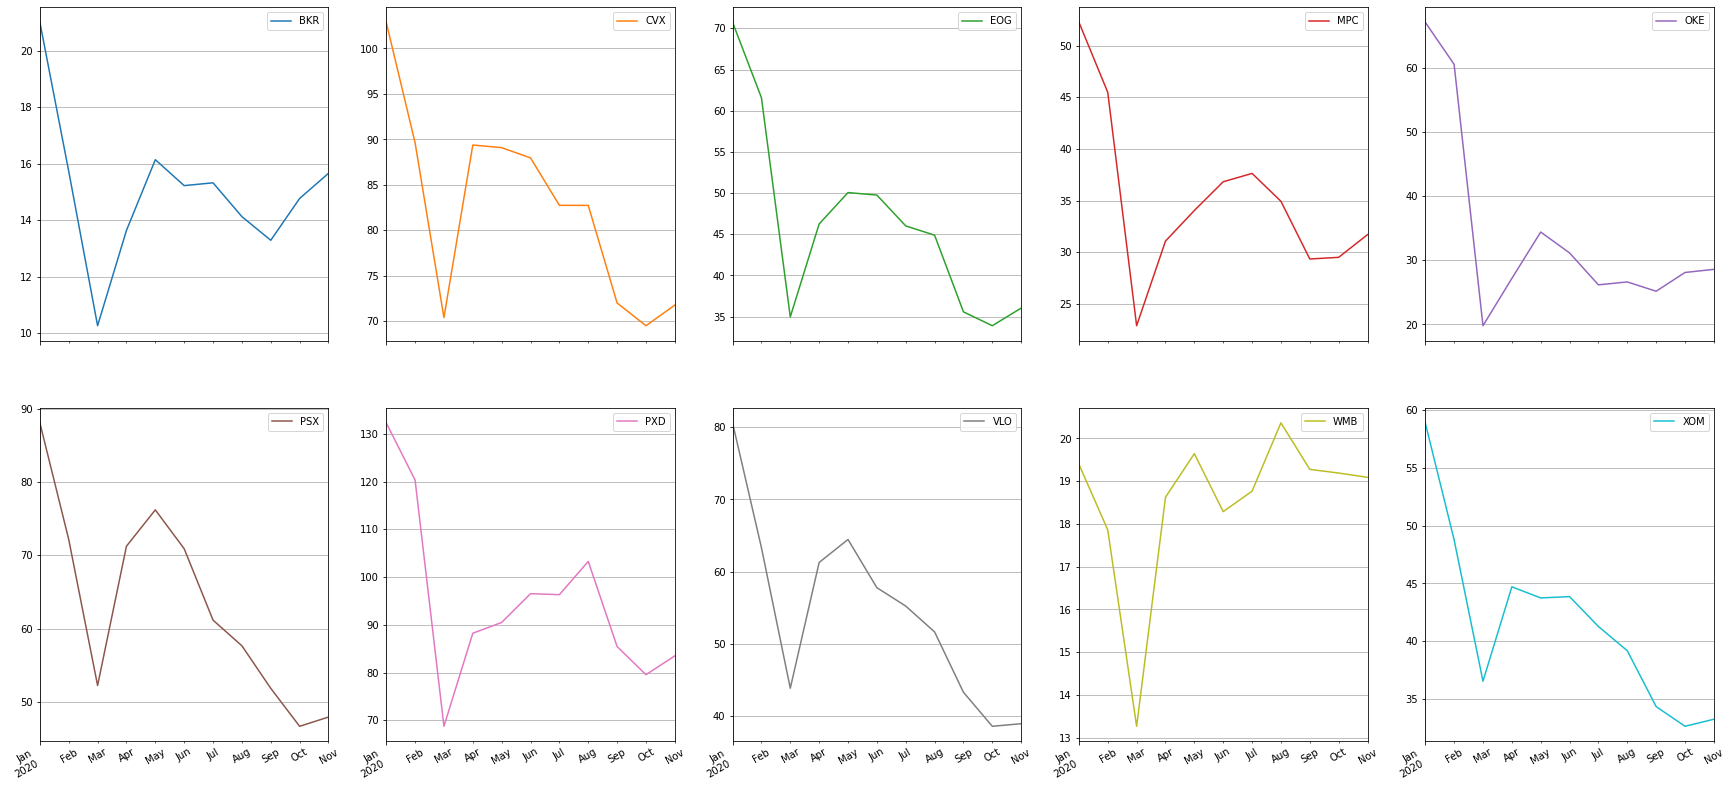

In [ ]:
# Plot the monthly price
prep_data.plot(subplots=True,grid=True,layout=(2,5), figsize=(30,15))
plt.show()

From the plot, we could find only the stock WMB didn't declined and all other declined very dramatically. Thus, we would choose the proforlio with the highest proportion of the Stock WMB, which showed at the end of the second notebook.

2.2 Calculate the monthly past returns (the difference from the previous day).

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = prep_data.pct_change()
return_data.dropna(inplace=True)
return_data

,BKR,CVX,EOG,MPC,OKE,PSX,PXD,VLO,WMB,XOM
2020-02-01,-0.251125,-0.128803,-0.129465,-0.129908,-0.097798,-0.180694,-0.090519,-0.214209,-0.079265,-0.171925
2020-03-01,-0.347421,-0.214625,-0.432185,-0.496895,-0.673112,-0.276117,-0.428653,-0.307274,-0.257218,-0.251261
2020-04-01,0.328571,0.269666,0.322662,0.358171,0.372306,0.363840,0.283411,0.396605,0.403960,0.223861
2020-05-01,0.183513,-0.003261,0.082439,0.095386,0.266412,0.069564,0.025641,0.051934,0.054724,-0.021519
2020-06-01,-0.056828,-0.012650,-0.006082,0.081696,-0.094576,-0.069597,0.066594,-0.103476,-0.069016,0.002575
2020-07-01,0.006498,-0.059285,-0.075207,0.021937,-0.159843,-0.137413,-0.002152,-0.044033,0.026164,-0.059034
2020-08-01,-0.078115,-0.000119,-0.024523,-0.071728,0.017349,-0.057240,0.072328,-0.064734,0.085207,-0.050856
2020-09-01,-0.059230,-0.129775,-0.207322,-0.159983,-0.054585,-0.100677,-0.172616,-0.161658,-0.053468,-0.123504
2020-10-01,0.111362,-0.034722,-0.047301,0.005453,0.116243,-0.099923,-0.068978,-0.108726,-0.004465,-0.049811
2020-11-01,0.060257,0.032662,0.063168,0.074576,0.017502,0.027004,0.049522,0.009324,-0.005211,0.018700


2.3 Calculate the cumulative monthly rate of return by using the daily percentage change values, adding 1 to them and calculating the cumulative product with the resulting values.

In [ ]:
# Calculate the cumulative monthly rate of return
cum_monthly_return = (1 + return_data).cumprod()
cum_monthly_return

,BKR,CVX,EOG,MPC,OKE,PSX,PXD,VLO,WMB,XOM
2020-02-01,0.748875,0.871197,0.870535,0.870092,0.902202,0.819306,0.909481,0.785791,0.920735,0.828075
2020-03-01,0.488700,0.684216,0.494303,0.437747,0.294919,0.593082,0.519630,0.544337,0.683905,0.620012
2020-04-01,0.649273,0.868726,0.653796,0.594536,0.404720,0.808868,0.666898,0.760224,0.960175,0.758808
2020-05-01,0.768423,0.865893,0.707694,0.651246,0.512542,0.865136,0.683998,0.799705,1.012720,0.742479
2020-06-01,0.724755,0.854939,0.703390,0.704450,0.464068,0.804925,0.729549,0.716955,0.942826,0.744391
2020-07-01,0.729465,0.804254,0.650490,0.719904,0.389889,0.694318,0.727979,0.685386,0.967494,0.700447
2020-08-01,0.672483,0.804158,0.634538,0.668267,0.396654,0.654576,0.780632,0.641018,1.049931,0.664825
2020-09-01,0.632651,0.699799,0.502984,0.561355,0.375002,0.588675,0.645882,0.537392,0.993793,0.582717
2020-10-01,0.703105,0.675500,0.479192,0.564417,0.418594,0.529853,0.601331,0.478964,0.989355,0.553691
2020-11-01,0.745472,0.697563,0.509462,0.606509,0.425920,0.544161,0.631110,0.483430,0.984200,0.564045


From the above analysis, we can see most of the cumulative monthly rate of return are below 1 and thus we can conclude that most of times we are losing money every month.

## Create a table that show the values each month by each stock

In [ ]:
# Select the allocation at the risk level 0.000091, which have highest proportion of WMB
allocation = [4.116941e-08,0.333864,1.626104e-08,3.350249e-08,0.243053,0.160506,2.752303e-08,5.976478e-08,0.134192,0.128385]

# Calculate the initial value of the 10 stocks
initial_value = [x*1000000 for x in allocation] 

initial_value


[0.041169410000000004,
 333864.0,
 0.016261039999999997,
 0.03350249,
 243053.0,
 160506.0,
 0.02752303,
 0.05976478,
 134192.0,
 128385.0]

In [ ]:
# Calculate the monthly value of the 10 stocks by cum_monthly_return*intially value
monthly_value = cum_monthly_return*initial_value

# Append the initial value to the dataframe
initial_value= pd.DataFrame([initial_value], columns=tickers_list)
monthly_value = pd.concat([initial_value, monthly_value])

In [ ]:
# Calculate the total investment each money and display all the values
monthly_value['sum'] =monthly_value.sum(axis=1)
monthly_value.round(3)

,BKR,CVX,EOG,MPC,OKE,PSX,PXD,VLO,WMB,XOM,sum
0,0.041,333864.000,0.016,0.034,243053.000,160506.000,0.028,0.060,134192.000,128385.000,1000000.178
2020-02-01 00:00:00,0.031,290861.172,0.014,0.029,219282.908,131503.538,0.025,0.047,123555.211,106312.373,871515.348
2020-03-01 00:00:00,0.020,228435.132,0.008,0.015,71681.050,95193.142,0.014,0.033,91774.603,79600.185,566684.201
2020-04-01 00:00:00,0.027,290036.339,0.011,0.020,98368.360,129828.184,0.018,0.045,128847.867,97419.547,744500.418
2020-05-01 00:00:00,0.032,289090.542,0.012,0.022,124574.823,138859.566,0.019,0.048,135898.896,95323.157,783747.115
2020-06-01 00:00:00,0.030,285433.467,0.011,0.024,112793.024,129195.351,0.020,0.043,126519.675,95568.632,749510.277
2020-07-01 00:00:00,0.030,268511.542,0.011,0.024,94763.792,111442.218,0.020,0.041,129829.934,89926.830,694474.442
2020-08-01 00:00:00,0.028,268479.556,0.010,0.022,96407.833,105063.314,0.021,0.038,140892.300,85353.548,696196.669
2020-09-01 00:00:00,0.026,233637.671,0.008,0.019,91145.396,94485.831,0.018,0.032,133359.032,74812.070,627440.102
2020-10-01 00:00:00,0.029,225525.252,0.008,0.019,101740.440,85044.538,0.017,0.029,132763.573,71085.625,616159.529


## Create a plot of the result:  


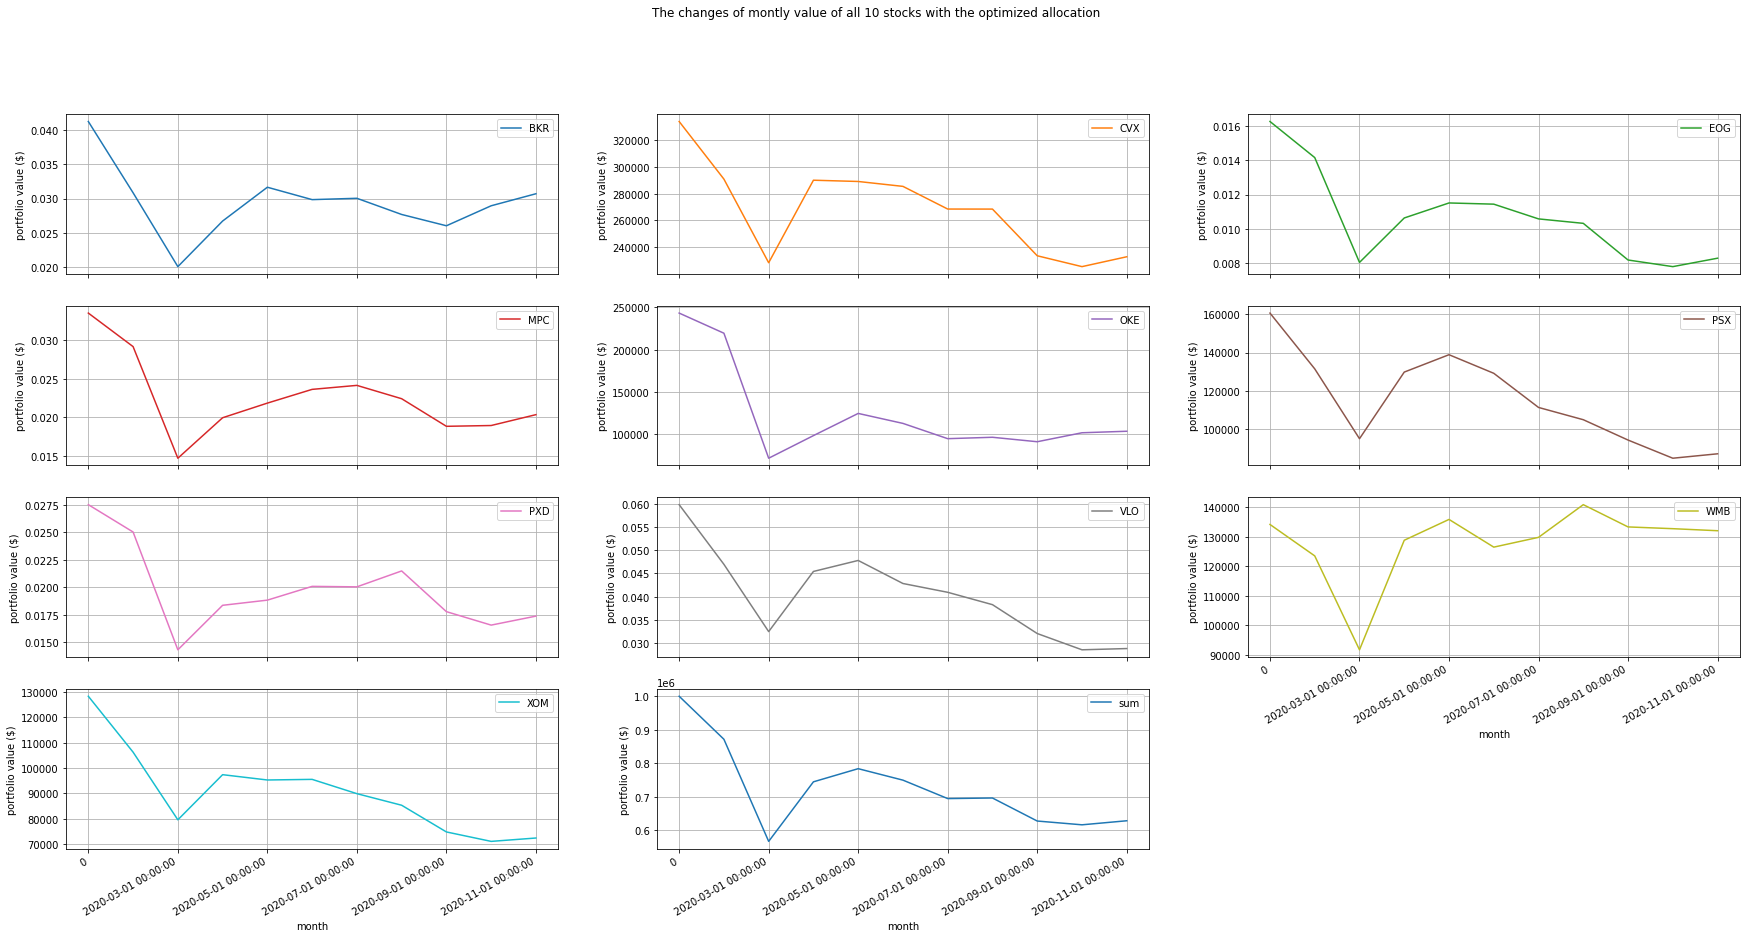

In [ ]:
# Plot the monthly value of ten stocks
monthly_value.plot(subplots=True,
        grid=True, 
        layout=(4,3),
         figsize=(30,15), xlabel='month', ylabel='portfolio value ($)',
title='The changes of montly value of all 10 stocks with the optimized allocation')
plt.show()

## Conclusion







* Based on the performance of ten stocks in 2020, we found out that we are doomed to lose money no matter which risk level we pick because nine of the ten stocks dropped sharply, and only one stock rose back to the price at the beginning of the year.
* Instead of maximizing returns of the 10-stock portfolio, we as a team decided that we would choose the optimized solutions via which we would incur minimum losses. The portfolio with lower risks is a safer choice for us to achieve this goal.
* During the modeling process, we found that the stock OKE performed the best among the stocks during 2019 as we could review in the chart of time series visualization. Thus, the proportion allocated for the stock OKE was the highest among the other stocks and the distribution was much less even.
* However, when we take a look at the trends of the stocks in 2020, the stocks has fallen by half. As a result, we incurred the most loss on the principle value of the stock OKE and the rate was around 57.4%.
* The analysis clearly shows that the models built on the previous year's data are unlikely to predict the accurate returns this year and due to the pandemic making 2020 being a tough year, we saw a major drop in the plot of the energy sector in the stock market. 
* When we reviewed the plot of the stock price fluctuation, these stocks have a greater extent of volatility on the stock price. As a result, three stocks WMB, BKR, CVX, are more likely to help us make the portfolio more resilient at a certain time.
* Our team would recommend that it will be a smarter move to invest less amount of money on these 10-stock portfolio based on what we have analyzed. We would rather wait out till the pandemic is over and the stock market is back on track.
* If we were to do this experiment again, it would be interesting to take into account all the current factors that would affect the stock price of the company. Probably, we could include a column named 'sensitivity/volatility' and have 3-5 years of history data to bulid a model with better forecast.
* Besides, we noticed that the only one stock that rose back to the price at the beginning of the year is Williams Companies(WMB) with business of natural gas. It would be a better idea of take a look at the companies with business related on clean and green energy. We may expect for a better peroformance of these stocks compared to the tradiitional energy companies.

## Work distribution

* Lauren- Focused on Notebook 1 financial analysis and charts, background information and research for determining the 10 stocks. Also recorded first half of the presentation.

* Vedant - Focussed on financial analysis and research for determining how can we best analyze and shortlist stocks. Also, contributed to Notebook 3 analysis and conclusion.

* Jiajun - Focused on Notebook 2 & 3 Modeling Building and problem solving. Also, provided support on all coding issues. 

* Junchi - Focused on the 5 chart that made in Notebook 2, part of the conclusion in Notebook 3. Recorded second half of the presentation.